<div class="alert alert-success h1" role="alert">
    <b> Introduction
</b>
<a class="anchor" id="intro"></a> </div>

We will study a housing dataset of Boston. The objective is to apply different regression models in order to predict the housing price. The Boston Housing Dataset is derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

<center>

|Column Name|Column Description|
|:---|:-------|
|`CRIM`|Per capita crime rate by town|
|`ZN`|Proportion of residential land zoned for lots over 25,000 sq.ft|
|`INDUS`|Proportion of non-retail business acres per town|
|`CHAS`|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|`NOX`|Nitric oxides concentration (parts per 10 million)|
|`RM`|Average number of rooms per dwelling|
|`AGE`|Proportion of owner-occupied units built prior to 1940|
|`DIS`|Weighted distances to five Boston employment centres|
|`RAD`|Index of accessibility to radial highways|
|`TAX`|Full-value property-tax rate per 10,000usd|
|`PTRATIO`|Pupil-teacher ratio by town|
|`B`|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|`LSTAT`| % lower status of the population |
|`MEDV`| Median value of owner-occupied homes in $1000's|

</center>


<div class="alert alert-success h1" role="alert">
    <b>Data</b>
<a class="anchor" id="intro"></a> </div>

In [1]:
#Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

#Data visualization
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprocess and analysis
# ==============================================================================
import pingouin as pg
import statsmodels.api as sm
from scipy import stats
import time
#Machine learning
# ==============================================================================
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split, RepeatedKFold, GridSearchCV, ParameterGrid
import multiprocessing
#Warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data=pd.read_csv('housing data.csv', header=None, delimiter=",", names=column_names)
df=data.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.select_dtypes(include=['float64', 'int']).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [6]:
# Plot-variables
# ==============================================================================
def plot_variables(data):
    """
    Generates boxplots and distribution plots for DataFrame or Series data.

    Args:
        data (pandas.DataFrame or pandas.Series): The input data to plot.

    Raises:
        ValueError: If the input type is neither DataFrame nor Series.

    Returns:
        None
    """    
    try:
        if isinstance(data, pd.DataFrame):
            fig, axs = plt.subplots(ncols=2, nrows=len(data.columns), figsize=(20, 100))
            row = 0
            for i in data.columns:
                plt.gca().set(xlabel=i, ylabel='Frequency')
                sns.boxplot(x=data[i], ax=axs[row][0], linewidth=1.0, color=(list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
                axs[row][0].set_xlabel(str(i), fontsize=18, fontweight="bold")
                axs[row][0].tick_params(labelsize=14)
                sns.histplot(data[i], ax=axs[row][1], bins=10, kde=True, color=(list(plt.rcParams['axes.prop_cycle'])*2)[row]["color"])
                axs[row][1].set_xlabel(str(i), fontsize=18, fontweight="bold")
                axs[row][1].set_ylabel('Frequency', fontsize=18, fontweight="bold")
                axs[row][1].tick_params(labelsize=14)
                row += 1
            fig.tight_layout()
            plt.subplots_adjust(top=0.97)
            fig.suptitle('Boxplot and distribution plot of the variables', fontsize=24, fontweight="bold")
        elif isinstance(data, pd.Series):
            fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

            plt.gca().set(xlabel=data.name, ylabel='Frequency')
            sns.boxplot(x=data, ax=axs[0], linewidth=1.0, color=(list(plt.rcParams['axes.prop_cycle'])*2)[0]["color"])
            axs[0].set_xlabel(str(data.name), fontsize=18, fontweight="bold")
            axs[0].tick_params(labelsize=14)
            sns.histplot(data, ax=axs[1], bins=10, kde=True, color=(list(plt.rcParams['axes.prop_cycle'])*2)[0]["color"])
            axs[1].set_xlabel(str(data.name), fontsize=18, fontweight="bold")
            axs[1].set_ylabel('Frequency', fontsize=18, fontweight="bold")
            axs[1].tick_params(labelsize=14)

            fig.tight_layout()
            plt.subplots_adjust(top=0.9)
            fig.suptitle('Boxplot and distribution plot of the variable', fontsize=24, fontweight="bold")
        else:
            raise ValueError("Invalid input type. Expected DataFrame or Series.")
    except Exception as e:
        print("An error occurred:", str(e))


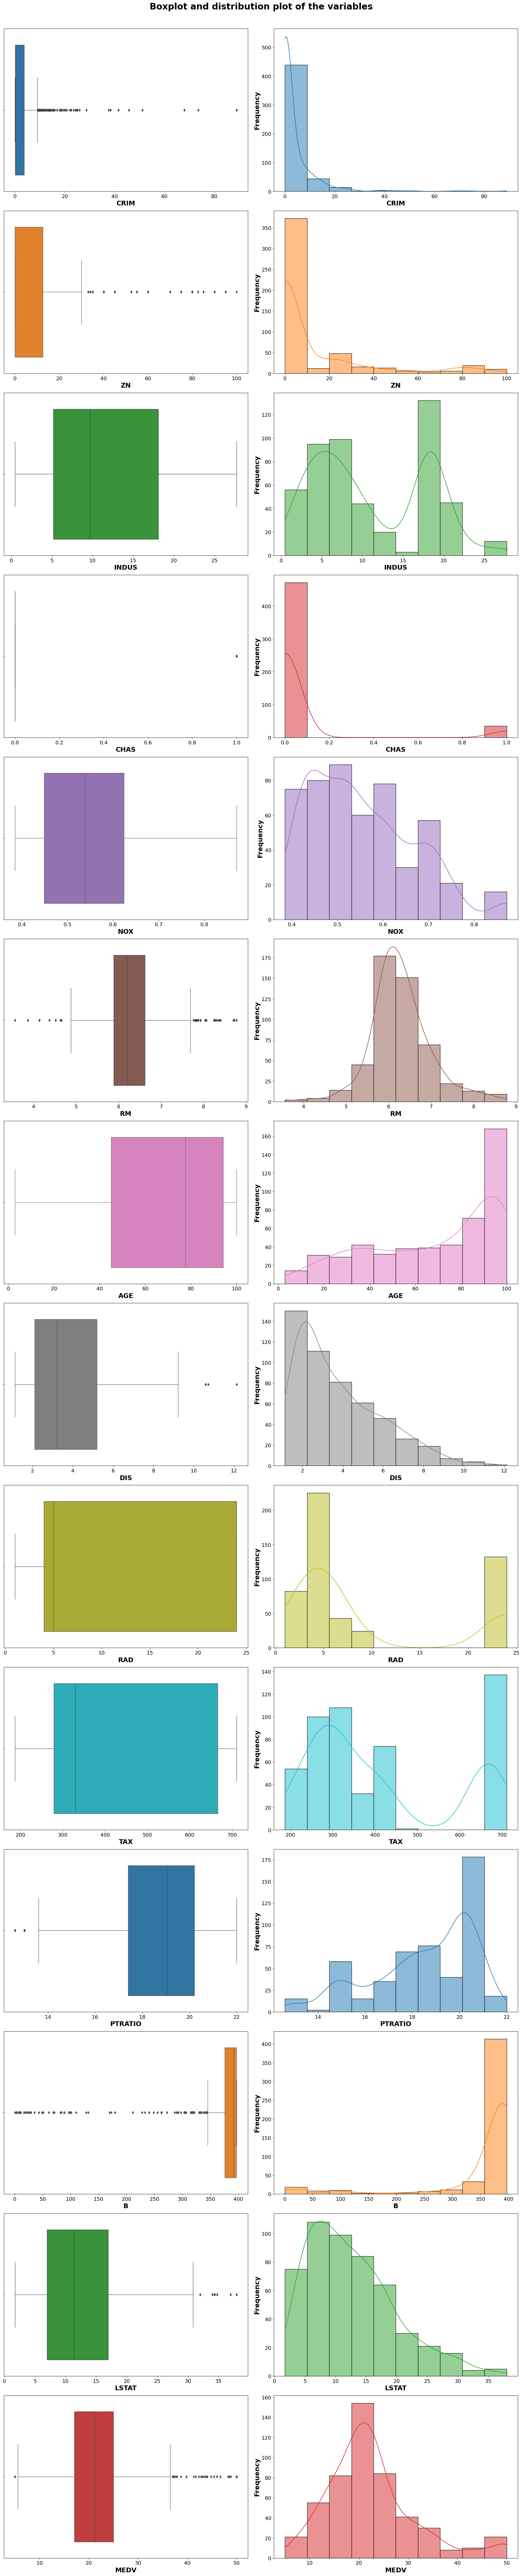

In [7]:
plot_variables(df)

In [8]:
def replace_outliers_with_nan(data):
    """
    Finds outliers in a DataFrame using the IQR criterion and replaces them with NaN.

    Args:
        data (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The DataFrame with outliers replaced by NaN.
    """
    # Calculate the first and third quartiles (25th and 75th percentiles)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 2.0 * iqr
    upper_bound = q3 + 2.0 * iqr

    # Replace outliers with NaN
    data[(data < lower_bound) | (data > upper_bound)] = np.nan

    return data

In [9]:
# Defining dependent and independent variables
X = df.drop(columns=['MEDV'], axis=1)
y=df['MEDV']

In [10]:
#Replacing outliers with Nan in X:
X=replace_outliers_with_nan(X)

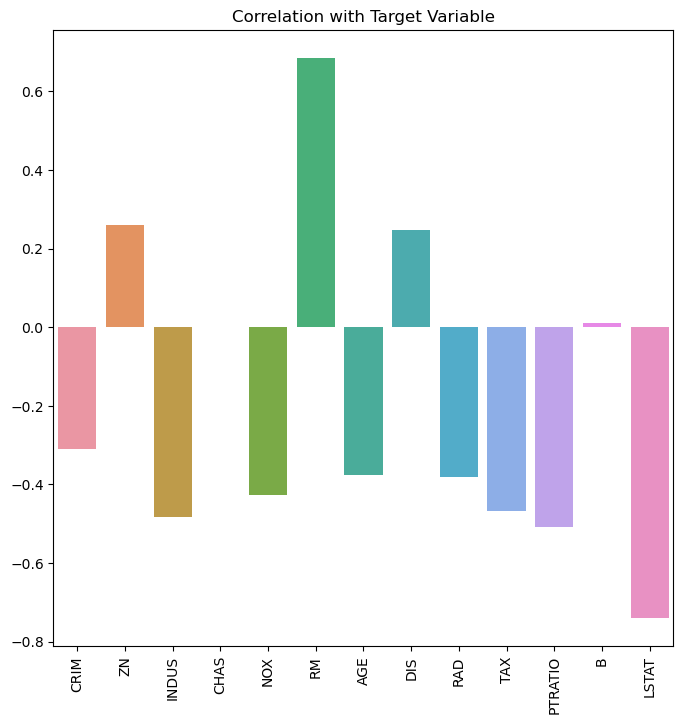

In [11]:
# Calculate the correlation between predictors and the target variable
corr_with_target = X.corrwith(y, method='pearson')
# Plot the correlation values
plt.figure(figsize=(8, 8))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable")
plt.show()

In [12]:
# Defining predictors with high/medium correlation
selected_predictors = corr_with_target[(corr_with_target > 0.2) | (corr_with_target < -0.4)]
selected_predictors.keys()
X = df[selected_predictors.keys()]
selected_predictors.keys()

Index(['ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [13]:
# Train/test split
# ==============================================================================
# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(404, 8) (102, 8) (404,) (102,)


In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    """
    CustomPreprocessor class for data preprocessing.

    Goal:
    - Handles data preprocessing, identifying numerical and categorical features.

    How it works:
    - Identifies numerical and categorical columns from the input data during the fit process.
    - Fits separate pipelines for numerical and categorical data.
    - Transforms input data based on the fitted pipelines during the transform process.
    """
    def __init__(self):
        self.numerical_columns = []
        self.categorical_columns = []
        self.preprocessor = None

    def fit(self, X, y=None):
        self.numerical_columns = X.select_dtypes(include=['int', 'float']).columns.tolist()
        self.categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

        # Numerical transformations for variables with outliers
        numeric_transformer = Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]
        )
        categorical_transformer = Pipeline(
            steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]
        )

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('numeric', numeric_transformer, self.numerical_columns),
                ('categorical', categorical_transformer, self.categorical_columns)
            ],
            remainder='passthrough'
        )

        self.preprocessor.fit(X)
        return self

    def transform(self, X):
        return self.preprocessor.transform(X)

    def get_feature_names_out(self, input_features=None):
        return self.preprocessor.get_feature_names_out(input_features)

In [15]:
class ModelFitter:
    """
    ModelFitter class for fitting and evaluating machine learning models.

    Goal:
    - Simplifies the process of fitting a model and predicting the target variable using a unified interface.
    """
    def __init__(self, model):
        self.model = model
        self.pipe = None

    def fit_and_predict(self, X_train, y_train, X_test):
        if not self.pipe:
            self.pipe = Pipeline([('preprocessing', CustomPreprocessor()), ('model', self.model)])

        self.pipe.fit(X=X_train, y=y_train)
        y_predicted = self.pipe.predict(X=X_test)
        return y_predicted

    def get_feature_names_out(self, input_features=None):
        return self.pipe.named_steps['preprocessing'].get_feature_names_out(input_features)

    @staticmethod
    def evaluate(X, y, y_predicted, y_test, model):
        rmse = mean_squared_error(
            y_true=y_test,
            y_pred=y_predicted,
            squared=False
        )
        mse = rmse ** 2
        score = cross_val_score(model, X, y, cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=42), scoring='neg_mean_squared_error')
        score_mean = score.mean()
        r2 = r2_score(y_test, y_predicted)
        return rmse, mse, r2, score_mean

<div class="alert alert-success h1" role="alert">
    <b>Finding the best model</b>
<a class="anchor" id="intro"></a> </div>

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
## Loop to find best models
random_state_=42
rfc = RandomForestRegressor(random_state=random_state_)
gbr = GradientBoostingRegressor(random_state=random_state_)
knn = KNeighborsRegressor()
desc_tr = DecisionTreeRegressor(random_state=random_state_)
reg = XGBRegressor(random_state=random_state_)
lm = LinearRegression()
models = [rfc, gbr, knn,desc_tr,reg,lm]

In [17]:
metrics_df = pd.DataFrame(columns=['Model', 'RMSE', 'MSE', 'R^2', 'Mean Cross-Validation RMSE', 'Computation time'])
for model in models:
    # Instantiate the model class
    model_fitter = ModelFitter(model)
    # Fit the model and predict the target variable
    start_time = time.time()
    y_predicted = model_fitter.fit_and_predict(X_train, y_train, X_test)
    end_time = time.time()
    comp_time= end_time-start_time
    # Evaluation
    rmse, mse, r2, score_mean = ModelFitter.evaluate(X_train, y_train, y_predicted, y_test, model)
    # Get the model name
    model_name = model.__class__.__name__
    # Append the metrics to the dataframe
    metrics_df = metrics_df.append({
        'Model': model_name,
        'RMSE': rmse,
        'MSE': mse,
        'R^2': r2,
        'Mean Cross-Validation RMSE': -score_mean,
        'Computation time': comp_time
    }, ignore_index=True)
metrics_df=metrics_df.set_index('Model')

In [18]:
metrics_df 

,RMSE,MSE,R^2,Mean Cross-Validation RMSE,Computation time
Model,,,,,
RandomForestRegressor,2.972804,8.837563,0.879489,14.259920,0.227057
GradientBoostingRegressor,2.576183,6.636720,0.909500,12.668023,0.086277
KNeighborsRegressor,4.296660,18.461290,0.748257,27.802959,0.007889
DecisionTreeRegressor,4.780198,22.850294,0.688407,31.116740,0.007185
XGBRegressor,2.729990,7.452845,0.898371,14.144292,0.064531
LinearRegression,4.959397,24.595619,0.664607,26.226925,0.012026


The best model according to these metrics is the GradientBoostingRegressor model. It has the lowest RMSE, MSE, cross-validation RMSE, and the highest $R^2$. The computation time is also relatively low. Altogether, the GradientBoostingRegressor model has the best combination of accuracy and speed.

<div class="alert alert-success h1" role="alert">
    <b> Hiperparameters optimization: GradientBoostingRegressor
</b>
<a class="anchor" id="intro"></a> </div>

Let's optimize the model, finding the optimal hyperparameters using a cross-validation (CV) approach.  

In [19]:
# Choose the model for GridSearchCV
chosen_model = gbr
# Instantiate the model class
model_fitter = ModelFitter(chosen_model)
pipe = Pipeline([('preprocessing', CustomPreprocessor()), ('model', chosen_model)])
# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Create GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Fit the GridSearchCV on the data
grid_search.fit(X_train, y_train)

# Get the best model from the GridSearchCV
best_model = grid_search.best_estimator_

# Predict the target variable for the test data using the best model
y_predicted = best_model.predict(X_test)

# Evaluation using the ModelFitter's evaluate method
rmse, mse, r2, score_mean = ModelFitter.evaluate(X_train, y_train, y_predicted, y_test, best_model)

In [20]:
# Print evaluation metrics
print("Best Model Parameters:", grid_search.best_params_)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
print("Mean Cross-validated Negative Mean Squared Error (CV-NMSE):", score_mean)

Best Model Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Root Mean Squared Error (RMSE): 2.5761832620552094
Mean Squared Error (MSE): 6.6367201996934195
R-squared (R2) Score: 0.9094998251326518
Mean Cross-validated Negative Mean Squared Error (CV-NMSE): -12.667839893522975


We observe that the metrics found with the GridSearch are worse than the default values, hence we will keep the default values. 

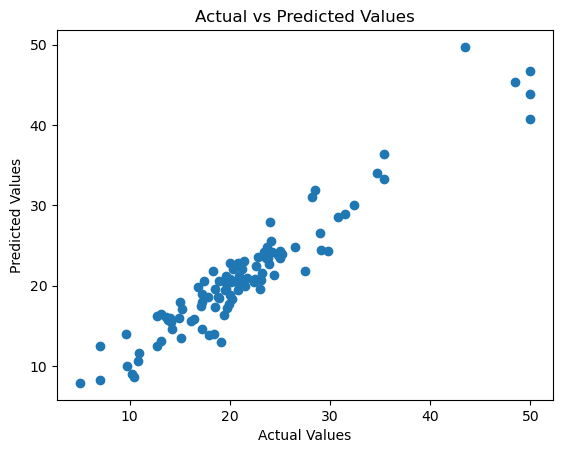

In [21]:
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

As we can observe, the predicted values follow a straight line, which roughly crosses at the origin, implying that the predicted values are great. 

In [22]:
# Get feature importances from the best model
feature_importances = best_model.named_steps['model'].feature_importances_

# Create a DataFrame to hold the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
3,RM,0.431396
7,LSTAT,0.375857
4,DIS,0.092208
6,PTRATIO,0.039767
2,NOX,0.038928
5,TAX,0.019725
1,INDUS,0.001867
0,ZN,0.000252


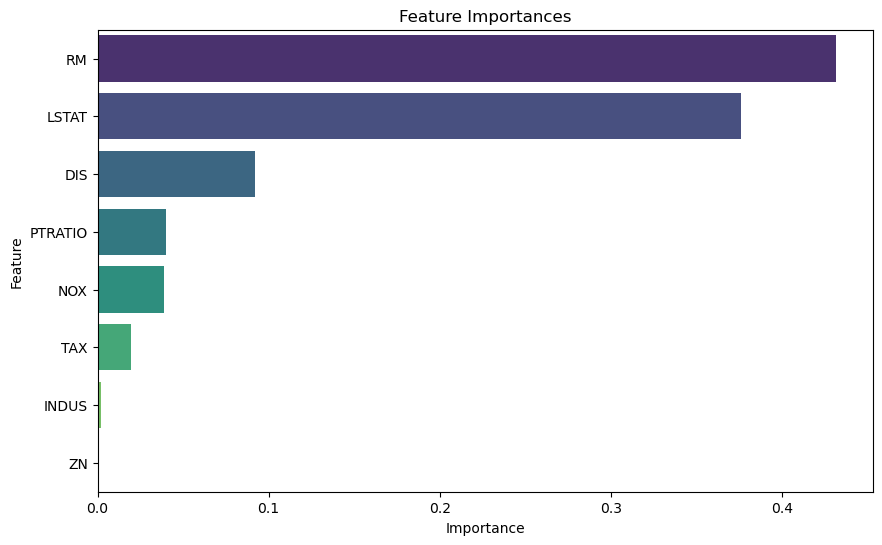

In [23]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<div class="alert alert-warning" role="alert">
    <h2> Hypothesis contrast</h2>
</div>

$$
\begin{align*}
H_0:\text{The residuals are normally distributed}: r (y_{test},y_{pred})=N(\mu,\sigma^2)\\
H_a:\text{The residuals are not normally distributed}: r (y_{test},y_{pred})\neq N(\mu,\sigma^2)
\end{align*}
$$

In [24]:
# D'Agostino's K-squared test
# ==============================================================================
residuals=y_test - y_predicted
k2, p_value = stats.normaltest(residuals)
print("-------------------------------------------")
print("Normal test for residuals")
print("-------------------------------------------")
print(f"Statistic for residuals = {k2}, p-value = {p_value}")
print('Kursotis for residuals:', stats.kurtosis(residuals))
print('Skewness for residuals:', stats.skew(residuals))

-------------------------------------------
Normal test for residuals
-------------------------------------------
Statistic for residuals = 6.07739235554584, p-value = 0.04789729836254469
Kursotis for residuals: 0.9110768269201177
Skewness for residuals: 0.39265204525373776


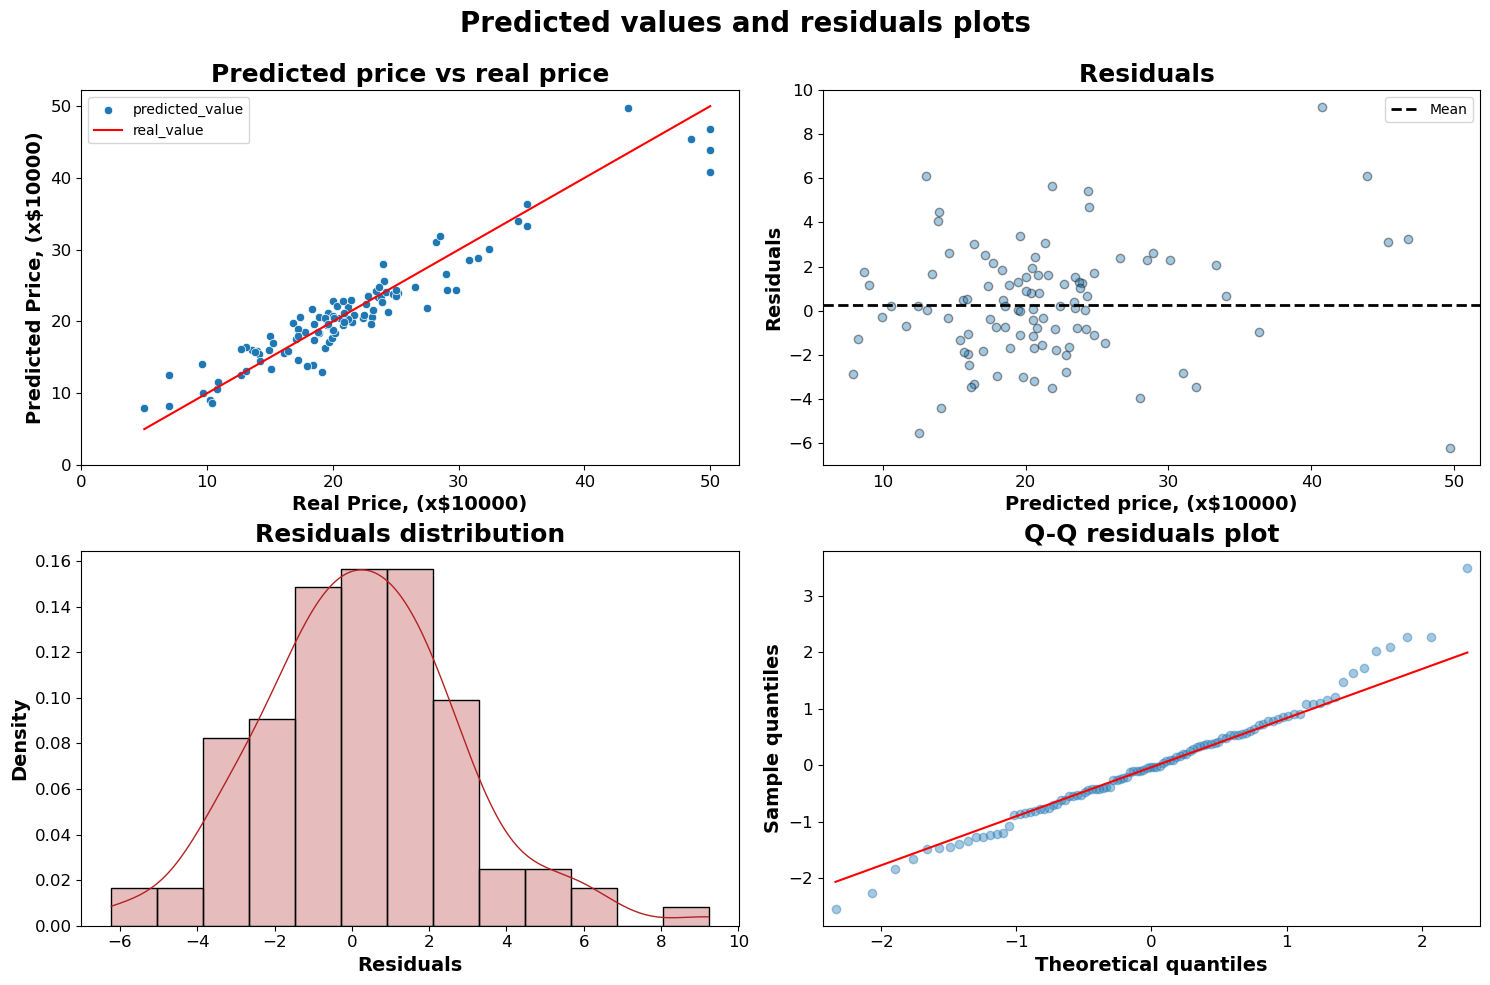

In [25]:
# Residuals
# ==============================================================================
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.scatterplot(x=y_test, y=y_predicted,ax=ax[0][0], label='predicted_value')
sns.lineplot(x=y_test, y=y_test,ax=ax[0][0], color='red',label='real_value')
ax[0][0].set_title("Predicted price vs real price", fontsize = 18, fontweight = "bold")
ax[0][0].set_xlabel('Real Price, (x$10000)', fontsize = 14, fontweight = "bold");
ax[0][0].set_ylabel('Predicted Price, (x$10000)',fontsize = 14, fontweight = "bold");
ax[0][0].set(xlim=(0, None), ylim=(0,None))
ax[0, 0].tick_params(axis='both', which='major', labelsize=12)
sns.histplot(
    data    = residuals,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = ax[1, 0]
)
ax[1, 0].set_title('Residuals distribution', fontsize = 18, fontweight = "bold")
ax[1, 0].set_xlabel('Residuals', fontsize = 14, fontweight = "bold")
ax[1, 0].set_ylabel('Density', fontsize = 14, fontweight = "bold")
ax[1, 0].tick_params(labelsize = 7)
ax[1, 0].tick_params(axis='both', which='major', labelsize=12)
ax[0, 1].scatter(y_predicted, residuals,
                   edgecolors=(0, 0, 0), alpha = 0.4)
ax[0, 1].axhline(y = (residuals).mean(), linestyle = '--', color = 'black', lw=2, label='Mean')
ax[0, 1].legend()
ax[0, 1].set_title('Residuals ', fontsize = 18, fontweight = "bold")
ax[0, 1].set_xlabel('Predicted price, (x$10000)', fontsize = 14, fontweight = "bold")
ax[0, 1].set_ylabel('Residuals', fontsize = 14, fontweight = "bold")
ax[0, 1].tick_params(axis='both', which='major', labelsize=12)
sm.qqplot(
    residuals,
    fit   = True,
    line  = 'q',
    ax    = ax[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
ax[1, 1].set_title('Q-Q residuals plot', fontsize = 18, fontweight = "bold")
ax[1, 1].set_xlabel('Theoretical quantiles', fontsize = 14, fontweight = "bold")
ax[1, 1].set_ylabel('Sample quantiles', fontsize = 14, fontweight = "bold")
ax[1, 1].tick_params(labelsize = 7)
ax[1, 1].tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Predicted values and residuals plots', fontsize = 20, fontweight = "bold");

The first graph, "Predicted price vs real price," displays the predicted prices (y-axis) against the actual prices (x-axis) for the test dataset. The red line represents the ideal scenario where predicted prices perfectly match the real prices. The scatter plot points follow the red line, indicating a good model fit.

The second graph, "Residuals distribution," shows the distribution of the residuals (the differences between the actual and predicted prices). The residuals represent the model's errors, and they follow approximately a normally distributed around zero.

The third graph, "Residuals," displays the relationship between the predicted prices and the residuals. The scatter plot points are randomly distributed around the horizontal line representing the mean of residuals. This plot helps us check for any patterns or trends in the residuals, indicating whether the model is systematically overestimating or underestimating certain price ranges.

The fourth graph, "Q-Q residuals plot," is a quantile-quantile plot that compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. As the residuals lie approximately along the diagonal line, it suggests that they are normally distributed.

Now, considering the D'Agostino's K-squared test results, the test statistic is 6.89, and the p-value is 0.03. The p-value is below the common significance level of 0.05, indicating that we have evidence to reject the null hypothesis that the residuals are normally distributed. Therefore, the residuals deviate significantly from a perfect normal distribution. Additionally, the kurtosis value of 1.17 suggests that the distribution of residuals has heavier tails than a normal distribution, and the skewness value of 0.36 indicates a slight right skewness in the residuals.

In summary, the model's scatter plot shows a reasonable fit between predicted and real prices, suggesting that the model performs decently. However, the residuals analysis and the D'Agostino's K-squared test indicate that the model's residuals are not perfectly normally distributed, and there might be some room for improvement in the model's performance to reduce systematic errors. Further investigation and potential model adjustments could be explored to enhance its predictive accuracy.

<div class="alert alert-success h1" role="alert">
    <b>Conclusions
</b>
<a class="anchor" id="intro"></a> </div>

The provided code presents the results of training and evaluating various regression models on a dataset. The models were evaluated based on several metrics, including Root Mean Squared Error (RMSE), Mean Squared Error (MSE), R-squared (R2) score, Mean Cross-validated Negative Mean Squared Error (CV-NMSE), and computation time. The models used in the evaluation include RandomForestRegressor, GradientBoostingRegressor, KNeighborsRegressor, DecisionTreeRegressor, XGBRegressor, and LinearRegression.

The initial metrics table summarizes the performance of each model, indicating that GradientBoostingRegressor achieved the lowest RMSE, MSE, and the highest R2 score among the models. This suggests that GradientBoostingRegressor is the best-performing model in this comparison.

Subsequently, the code applies GridSearchCV to find the best hyperparameters for the GradientBoostingRegressor model. The chosen hyperparameters are 'n_estimators': 100, 'learning_rate': 0.1, and 'max_depth': 3. After obtaining the best model, it is evaluated on the test data. The evaluation results show that the chosen GradientBoostingRegressor model achieved an RMSE of 2.58, an MSE of 6.64, an R2 score of 0.91, and a negative CV-NMSE of -12.67.

Furthermore, the code calculates feature importances for the best model and displays them in descending order. The most important features, according to their importance scores, are 'RM' and 'LSTAT', followed by 'DIS', 'PTRATIO', 'NOX', 'TAX', 'INDUS', and 'ZN'.

Lastly, the code performs a D'Agostino's K-squared test on the residuals of the best model. The test checks whether the residuals follow a normal distribution. The results indicate that the residuals deviate significantly from a perfect normal distribution, as the p-value (0.03) is below the significance level of 0.05. Additionally, the kurtosis value of 1.17 suggests heavier tails in the residuals, and the skewness value of 0.36 indicates a slight right skewness.

In conclusion, the code provides a comprehensive analysis of various regression models, highlighting the best-performing model (GradientBoostingRegressor) and its hyperparameters. It also identifies the most important features influencing the model's predictions. However, the analysis reveals that the model's residuals do not follow a perfect normal distribution, indicating potential areas for further model improvement. Overall, the code demonstrates a robust evaluation process and insightful visualizations to aid in the selection and understanding of the best model for the given dataset.
